In [172]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [173]:
#load data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [174]:
#Save CustomerID separately for possible future use
ids=data['customerID']

In [175]:
#List the features
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [176]:
#Tranform Total Charges to numerical data and substitute missing values with 0
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [177]:
mask_churn=data['Churn']=='Yes'
mask_not_churn=data['Churn']=='No'

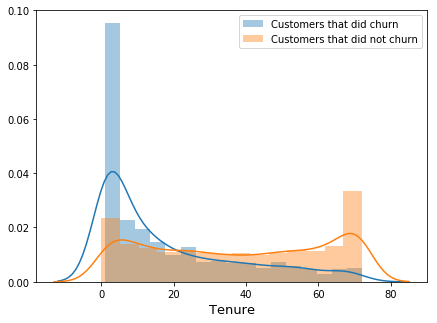

In [178]:
#Plot distribution of tenure 
import seaborn as sns
from matplotlib import pyplot as plt 
plt.subplots(figsize=(7, 5))
sns.distplot(data[mask_churn]['tenure'],label='Customers that did churn');
plt.xlabel('Tenure', fontsize=13)
sns.distplot(data[mask_not_churn]['tenure'],label='Customers that did not churn');
plt.xlabel('Tenure', fontsize=13)
plt.legend()
plt.savefig('./figures/'+'tenure.png')
plt.show()

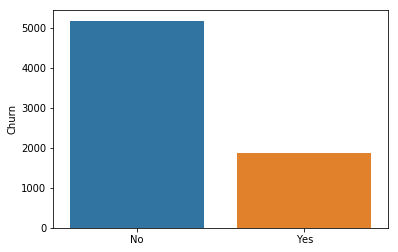

In [179]:
sns.barplot(x=data['Churn'].value_counts().index,y=data['Churn'].value_counts())
plt.savefig('./figures/ChurnCount.png')

In [180]:
data['Churn'].value_counts()/len(data)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [181]:
print('The mean is:',data[mask_churn].tenure.mean())
print('The mode is: ',data[mask_churn].tenure.mode()[0])
print('The median is: ',data[mask_churn].tenure.median())

The mean is: 17.979133226324237
The mode is:  1
The median is:  10.0


In [182]:
temp_df=data.copy()
temp_df.Churn.replace(to_replace =["Yes", "No"],value =[1,0],inplace=True)
temp_df.SeniorCitizen.replace(to_replace =[0, 1],value =['No','Yes'],inplace=True)
temp_df.drop('customerID',axis=1,inplace=True)

In [183]:
#Get the cathegorical and not categorical data
categorical=temp_df.dtypes[temp_df.dtypes=='object'].index
not_categorical=temp_df.dtypes[temp_df.dtypes!='object'].index

In [184]:
categorical

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [185]:
not_categorical

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

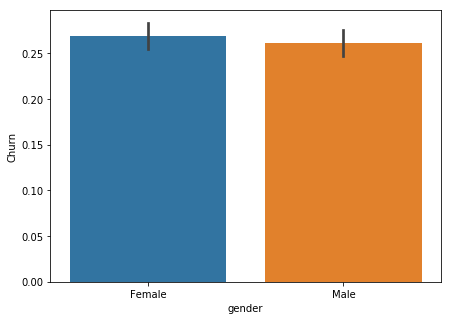

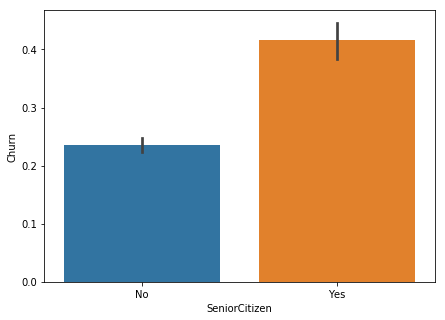

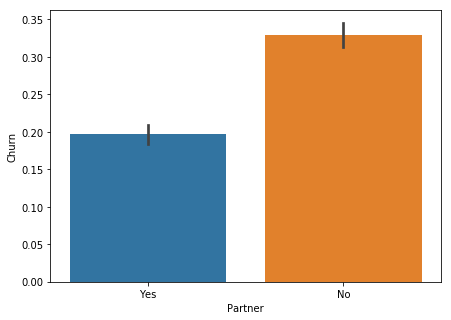

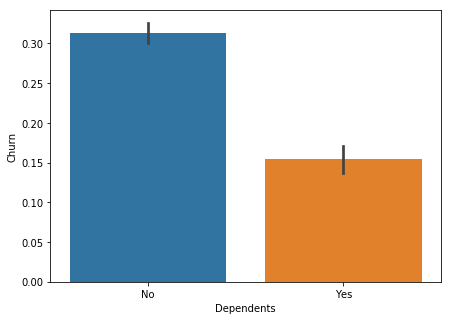

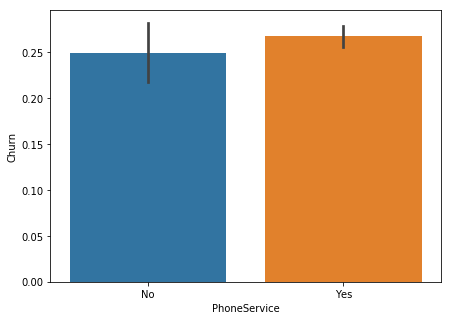

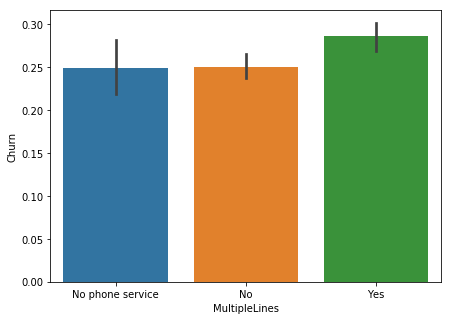

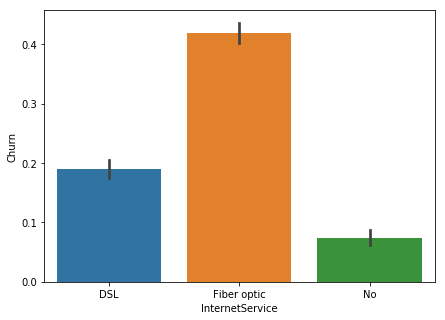

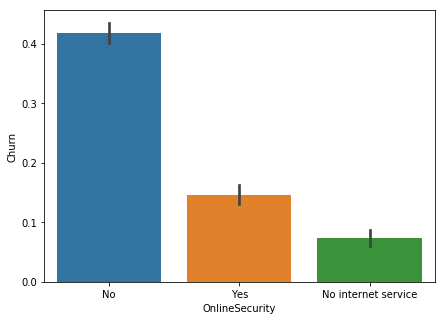

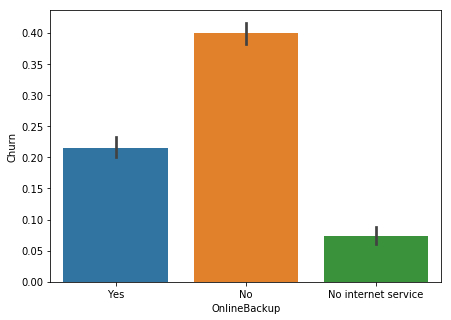

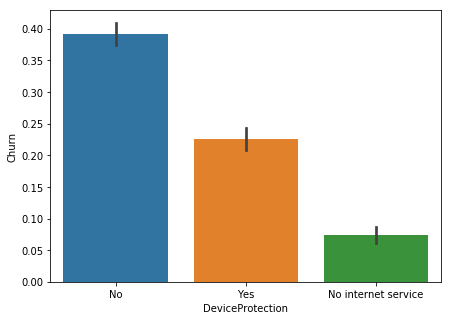

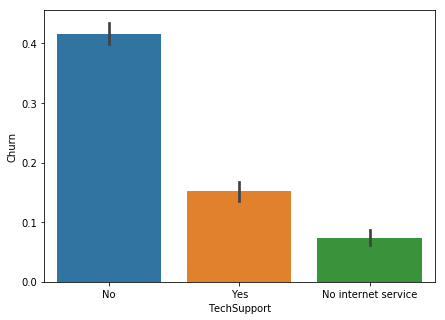

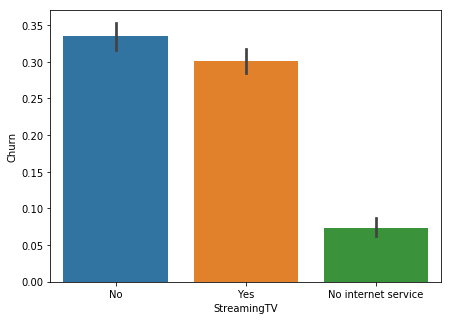

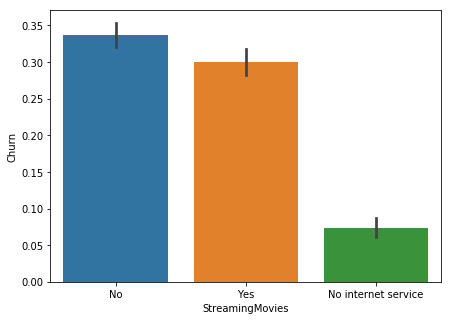

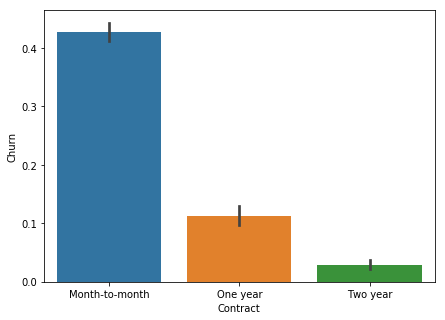

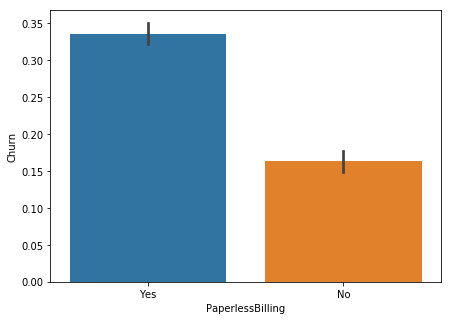

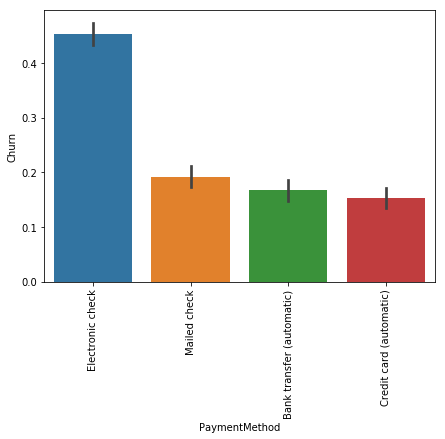

In [186]:
#histograms for categorical data (Senior Citizen in reality is categorical)
for cat in categorical:
    plt.figure(figsize=(7, 5))
    plot=sns.barplot(x=cat, y="Churn", data=temp_df)
    if cat=='PaymentMethod':
        for item in plot.get_xticklabels():
            item.set_rotation(90)
    plt.savefig('./figures/'+cat+'.png')

In [187]:
mask_churn=temp_df['Churn']==1
mask_not_churn=temp_df['Churn']==0

<Figure size 504x360 with 0 Axes>

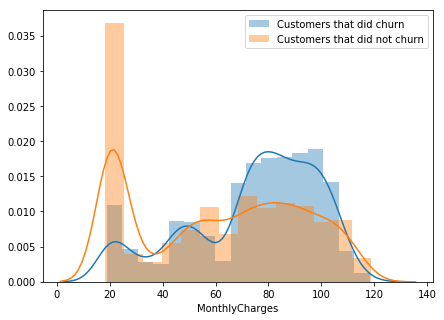

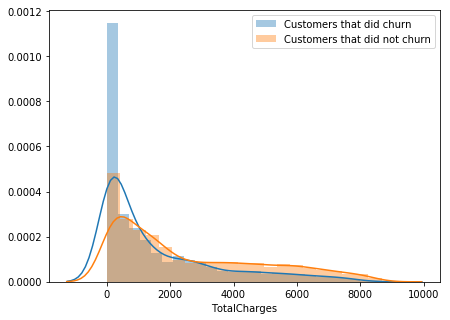

<Figure size 504x360 with 0 Axes>

In [188]:
#plot for non categorical data
for cat in not_categorical:
    plt.figure(figsize=(7, 5))
    if cat!='Churn' and cat!='tenure':
        sns.distplot(temp_df[mask_churn][cat],label='Customers that did churn');
        sns.distplot(temp_df[mask_not_churn][cat],label='Customers that did not churn');
        plt.legend()
        plt.savefig('./figures/'+cat+'.png')

In [189]:
#get dummy variables for cathegorical data
dummies = pd.get_dummies(
    data[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]]
) 
data = dummies.join(data[['MonthlyCharges', 'TotalCharges']])

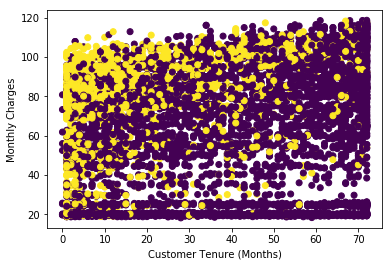

In [190]:
#scatter plot between tenure and Monthly Charges yellow dots correspond to custumenrs that did churn
plt.scatter( data['tenure'], data['MonthlyCharges'], c=data['Churn_Yes']) 
plt.xlabel('Customer Tenure (Months)') 
plt.ylabel('Monthly Charges')
plt.show()

In [191]:
#Select features that are independent of each other (could be done in smarter ways)
#x_select1=['tenure','SeniorCitizen','gender_Female','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','MultipleLines_No phone service','InternetService_DSL','InternetService_Fiber optic','OnlineSecurity_Yes','OnlineSecurity_No internet service','OnlineBackup_Yes','OnlineBackup_No internet service','DeviceProtection_Yes','DeviceProtection_No internet service','TechSupport_Yes','TechSupport_No internet service','StreamingTV_Yes','StreamingTV_No internet service','StreamingMovies_Yes','StreamingMovies_No internet service','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','MonthlyCharges','TotalCharges','Churn_Yes']

In [192]:
#Select features that are independent of each other (could be done in smarter ways)
x_select=['tenure','SeniorCitizen','gender_Female','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','MonthlyCharges','TotalCharges']

In [193]:
#Train simple logistic regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(data[x_select], data[['Churn_Yes']]) 
clf = LogisticRegression(solver='lbfgs', max_iter=1000) 
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [194]:
#Compute probabilities and predictions
data['linear_prob']=clf.predict(data[x_select])
data['linear_pred']=clf.predict(data[x_select])

In [195]:
x_select.append('Churn_Yes')

In [196]:
#Save data
data.to_csv('data.csv', index=False)
ids.to_csv('customerID.csv',index=False)

In [197]:
x_select

['tenure',
 'SeniorCitizen',
 'gender_Female',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'TotalCharges',
 'Churn_Yes']

In [198]:
#Save model
import pickle
with open('modelclf.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [199]:
data[x_select]

,tenure,SeniorCitizen,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,Churn_Yes
0,1,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,29.85,29.85,0
1,34,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,56.95,1889.50,0
2,2,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,53.85,108.15,1
3,45,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,42.30,1840.75,0
4,2,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,0,1,1,1,1,1,0,1,...,1,1,0,1,0,0,0,84.80,1990.50,0
7039,72,0,1,1,1,1,1,0,1,0,...,1,1,0,1,0,1,0,103.20,7362.90,0
7040,11,0,1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,1,29.60,346.45,0
7041,4,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,74.40,306.60,1


In [200]:
#Load and train Cox model split the data for hyperparameter tuning
from lifelines import CoxPHFitter
cph=CoxPHFitter()
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2) 
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4158 right-censored observations>

In [201]:
#Print Model summary
cph.print_summary()

In [202]:
#Consider only customers that did not leave yet
censored_subjects = data.loc[data['Churn_Yes'] == 0]

In [203]:
censored_subjects

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,MonthlyCharges,TotalCharges,linear_prob,linear_pred
0,0,1,1,0,0,1,1,0,1,0,...,0,0,1,0,1,0,29.85,29.85,1,1
1,0,34,0,1,1,0,1,0,0,1,...,0,0,0,1,1,0,56.95,1889.50,0,0
3,0,45,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,42.30,1840.75,0,0
6,0,22,0,1,1,0,0,1,0,1,...,0,1,0,0,1,0,89.10,1949.40,0,0
7,0,10,1,0,1,0,1,0,1,0,...,0,0,0,1,1,0,29.75,301.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,21.15,1419.40,0,0
7038,0,24,0,1,0,1,0,1,0,1,...,0,0,0,1,1,0,84.80,1990.50,0,0
7039,0,72,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,103.20,7362.90,0,0
7040,0,11,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,29.60,346.45,0,0


In [204]:
#Compute the probabilities that the customer WILL NOT churn after a certain month. These probabilities are general they do not know that some subjects may already been in tenure for some months
unconditioned_sf = cph.predict_survival_function(censored_subjects[x_select])

In [205]:
#In order to encode the information about the tenure that already passed we condition the probabilites with bayes theorem. We subtract 1 to get the probability that the customer will churn after a certain month 
conditioned_sf = unconditioned_sf.apply(lambda c: 1-(c / c.loc[data.loc[c.name, 'tenure']]).clip_upper(1))

In [206]:
subjects=data.loc[data['Churn_Yes'] == 0].index

In [207]:
subjects

Int64Index([   0,    1,    3,    6,    7,    9,   10,   11,   12,   14,
            ...
            7030, 7031, 7033, 7035, 7036, 7037, 7038, 7039, 7040, 7042],
           dtype='int64', length=5174)

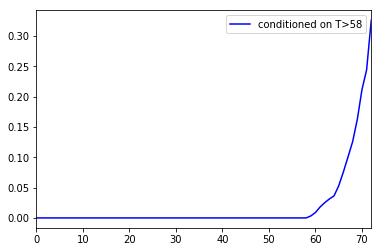

In [208]:
#Plot the probabilities. Subject only take the values of subjects that did not churn
subject = 12
val=data.loc[subject,'tenure']
#unconditioned_sf[subject].plot(ls="--", color='k', label="unconditioned") 
conditioned_sf[subject].plot(color="b", label="conditioned on T>"+str(val)) 
plt.legend()

In [209]:
unconditioned_sf.shape

(73, 5174)

In [210]:
x_select

['tenure',
 'SeniorCitizen',
 'gender_Female',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'TotalCharges',
 'Churn_Yes']

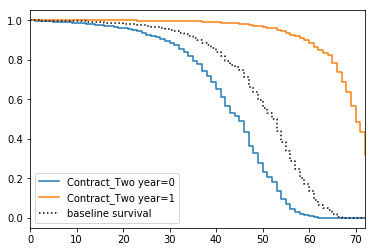

In [211]:
#Plot the probability of not Churning given values for a certain Feature
cph.plot_covariate_groups('Contract_Two year', values=[0,1])

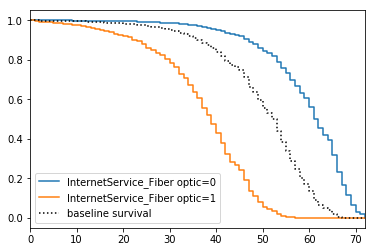

In [212]:
cph.plot_covariate_groups('InternetService_Fiber optic',[0,1])

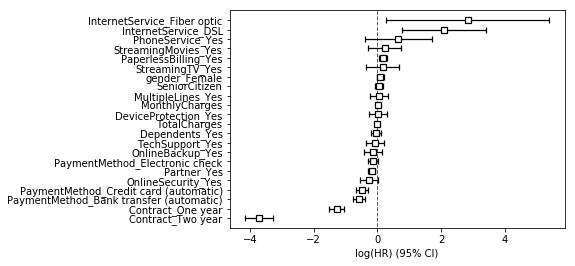

In [213]:
#Plot the relevance of the Feature in determining if a customer will churn or not. Negative values makes the feature influence negatively the probability of churning (making it likely that the customer to stay). The opposite for positive values
cph.plot()

In [214]:
#Save the model
import pickle
with open('modelcph.pkl', 'wb') as model_file:
    pickle.dump(cph, model_file)

In [215]:
import shap

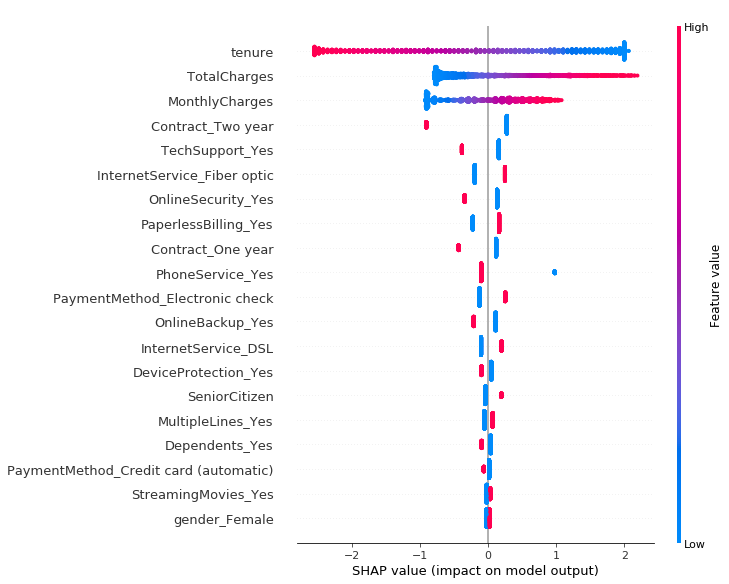

In [218]:
#plot summery plot for logistic regression using shap
shap_values=shap.LinearExplainer(clf,X_test).shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=x_select,show=False)
plt.savefig('./figures/shapLogistic.png')